# Logistic Regression

## A classification algorithm, not a regression algorithm 

## Used to predict categorical outcomes — often binary 

## Outputs probabilities, which are then turned into classes


In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.datasets import fetch_openml

In [2]:
titanic_data = fetch_openml("titanic", version=1, as_frame=True)  

In [3]:
df = titanic_data['data']

In [4]:
df['survived'] = titanic_data['target']

### Here, we will be using graphs to determine columns that are important to our target variable

In [5]:
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0


<Axes: xlabel='survived', ylabel='count'>

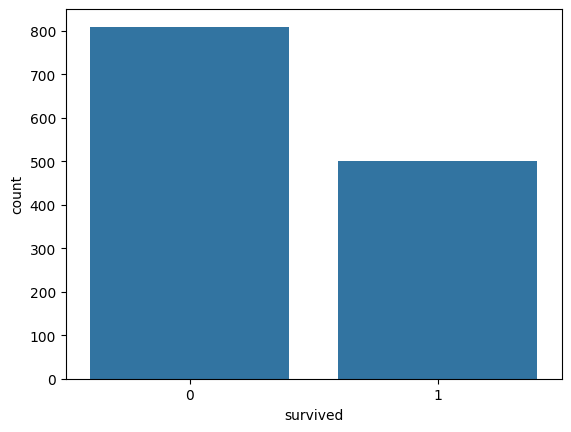

In [6]:
sns.countplot(x='survived', data=df)

<Axes: xlabel='survived', ylabel='count'>

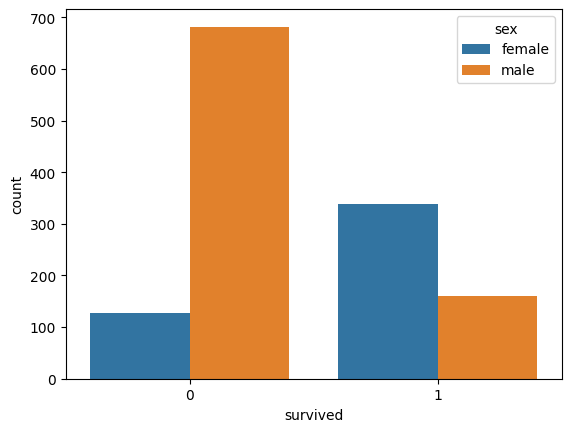

In [7]:
sns.countplot(x='survived', hue = "sex" , data=df)

<Axes: xlabel='survived', ylabel='count'>

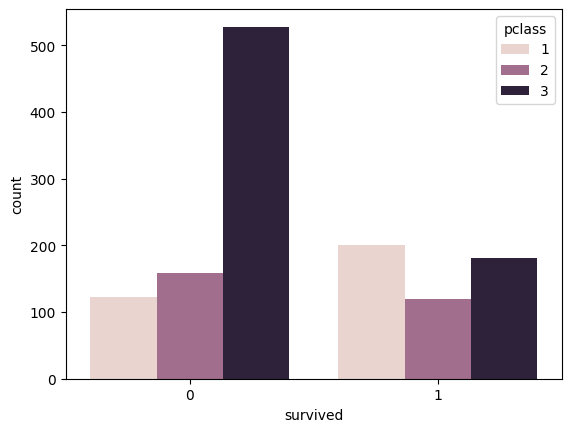

In [8]:
sns.countplot(x='survived', hue = "pclass" , data=df)

<Axes: ylabel='Frequency'>

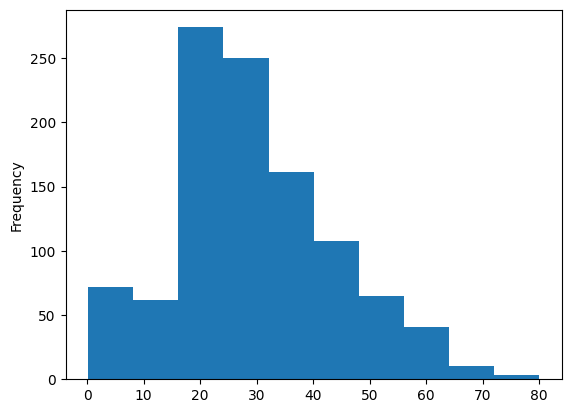

In [9]:
df['age'].plot.hist()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   name       1309 non-null   object  
 2   sex        1309 non-null   category
 3   age        1046 non-null   float64 
 4   sibsp      1309 non-null   int64   
 5   parch      1309 non-null   int64   
 6   ticket     1309 non-null   object  
 7   fare       1308 non-null   float64 
 8   cabin      295 non-null    object  
 9   embarked   1307 non-null   category
 10  boat       486 non-null    object  
 11  body       121 non-null    float64 
 12  home.dest  745 non-null    object  
 13  survived   1309 non-null   category
dtypes: category(3), float64(3), int64(3), object(5)
memory usage: 116.8+ KB


--- 

## Data Pre-processing

In [11]:
df.isnull().sum()

pclass          0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
survived        0
dtype: int64

Calculate the number and percentage of missing values 

<Axes: title={'center': 'missing values in %'}, ylabel='percentage'>

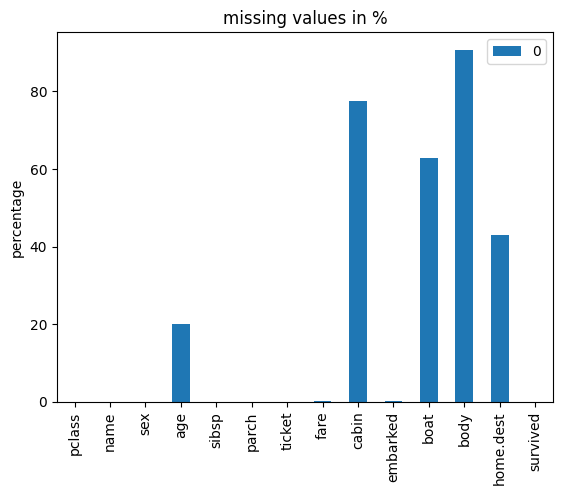

In [12]:
missing_values = pd.DataFrame(df.isnull().sum()/len(df) * 100)

missing_values.plot(kind = 'bar', title = 'missing values in %', ylabel = 'percentage')

### We Engineer a new column of travelled alone and one of family, dropping sibsp and parch, followed by dropping non relevant columns

In [13]:
df['family'] = df['sibsp'] + df['parch']
df.loc[df['family'] > 0, 'travelled_alone'] = 0
df.loc[df['family'] == 0, 'travelled_alone'] = 1

In [14]:
df['family'].head()

0    0
1    3
2    3
3    3
4    3
Name: family, dtype: int64

In [15]:
df.drop(['sibsp', 'parch'], axis=1, inplace=True)

Text(0.5, 1.0, 'Number of Passengers Travelling Alone')

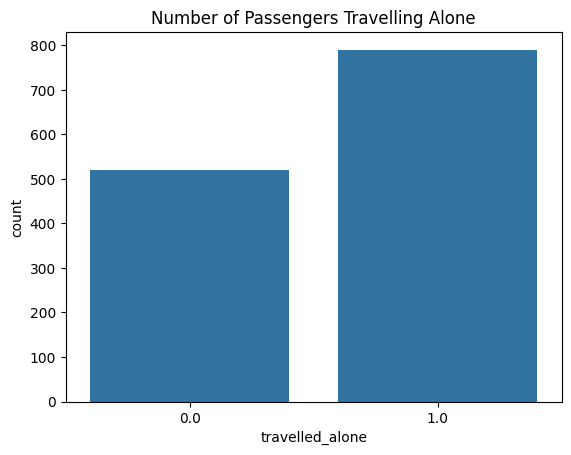

In [16]:
sns.countplot(x='travelled_alone', data = df)
plt.title("Number of Passengers Travelling Alone")

In [17]:
df.head()

,pclass,name,sex,age,ticket,fare,cabin,embarked,boat,body,home.dest,survived,family,travelled_alone
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,0,1.0
1,1,"Allison, Master. Hudson Trevor",male,0.9167,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1,3,0.0
2,1,"Allison, Miss. Helen Loraine",female,2.0000,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,3,0.0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0,3,0.0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,3,0.0


In [18]:
df.drop(['name', 'ticket', 'home.dest'], axis=1, inplace=True)

In [19]:
df.drop(['cabin', 'body', 'boat'], axis=1, inplace=True)

In [20]:
sex = pd.get_dummies(df['sex'], drop_first=True)
print(sex)

       male
0     False
1      True
2     False
3      True
4     False
...     ...
1304  False
1305  False
1306   True
1307   True
1308   True

[1309 rows x 1 columns]


In [21]:
df.isnull().sum() 

pclass               0
sex                  0
age                263
fare                 1
embarked             2
survived             0
family               0
travelled_alone      0
dtype: int64

In [22]:
from sklearn.impute import SimpleImputer

### We use SimpleImputer to input the mean for the missing values in age and fare, and the most frequent values for the embarked column

In [23]:
imp_mean = SimpleImputer(strategy='mean')

In [24]:
df['age'] = imp_mean.fit_transform(df[['age']])

In [25]:
df['fare'] = imp_mean.fit_transform(df[['fare']])

In [26]:
imp_freq = SimpleImputer(strategy='most_frequent')

In [27]:
df['embarked'] = imp_freq.fit_transform(df[['embarked']]).ravel()

In [28]:
df.isnull().sum()

pclass             0
sex                0
age                0
fare               0
embarked           0
survived           0
family             0
travelled_alone    0
dtype: int64

In [29]:
df.head()

,pclass,sex,age,fare,embarked,survived,family,travelled_alone
0,1,female,29.0000,211.3375,S,1,0,1.0
1,1,male,0.9167,151.5500,S,1,3,0.0
2,1,female,2.0000,151.5500,S,0,3,0.0
3,1,male,30.0000,151.5500,S,0,3,0.0
4,1,female,25.0000,151.5500,S,0,3,0.0


### We map the sex column to 1 and 0, while we use get_dummies on the embarked column to convert it into 3 different columnsof 1 and 0

In [30]:
df['sex'] = df['sex'].map({'male': 1, 'female': 0})

In [31]:
df['embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [32]:
df = pd.get_dummies(df, columns=['embarked'])

In [33]:
df.drop(['embarked_C'], axis=1, inplace=True)
df.head()

,pclass,sex,age,fare,survived,family,travelled_alone,embarked_Q,embarked_S
0,1,0,29.0000,211.3375,1,0,1.0,False,True
1,1,1,0.9167,151.5500,1,3,0.0,False,True
2,1,0,2.0000,151.5500,0,3,0.0,False,True
3,1,1,30.0000,151.5500,0,3,0.0,False,True
4,1,0,25.0000,151.5500,0,3,0.0,False,True


### Separate data into features and target, and then split data into training and test sets

In [34]:
X = df.drop(['survived'], axis=1)
X.head()

,pclass,sex,age,fare,family,travelled_alone,embarked_Q,embarked_S
0,1,0,29.0000,211.3375,0,1.0,False,True
1,1,1,0.9167,151.5500,3,0.0,False,True
2,1,0,2.0000,151.5500,3,0.0,False,True
3,1,1,30.0000,151.5500,3,0.0,False,True
4,1,0,25.0000,151.5500,3,0.0,False,True


In [35]:
y = df['survived']

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

In [39]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(916, 8) (916,)
(393, 8) (393,)


In [40]:
from sklearn.linear_model import LogisticRegression
mod = LogisticRegression()
mod.fit(x_train, y_train)

C:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [41]:
pred = mod.predict(x_test)

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.7964376590330788

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[204,  32],
       [ 48, 109]], dtype=int64)